<a href="https://colab.research.google.com/github/ThuanPhong0126/CS114.K21/blob/master/Sarcasm/CaseStudy1_Sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thành viên nhóm:
- Nguyễn Duy Nhật - 18520118
- Đỗ Nguyễn Thuận Phong - 18520126
- Nguyễn Dương Trúc Phương - 18520133

#Sarcasm Detection

Nhiệm vụ bài toán là khi đọc qua một tiêu đề hay một câu và nhận biết câu đó có tính mỉa mai hay không.

Dataset cho bài toán này được cung cấp tại [kaggle](https://https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection). Dataset này đã được thu thập bằng cách lấy các tiêu đề từ hai trang báo điện tử. Đầu tiên là trang [Huffpost](https://https://www.huffpost.com/) với các tiêu đề sự thật, chính thống và trang [Theonion](https://www.theonion.com/) với các tiêu đề mỉa mai. 

Ưu điểm cho bộ dataset này là do được thu thập từ các trang báo được viết bởi các nhà báo nên nó đảm bảo về mặt chính tả. Ngoài ra các tin châm biếm được thu thập đảm bảo chất lượng cao vì nó được viết bởi Theonion là trang chuyên viết các bài báo châm biếm.

##Thực hiện liên kết colab với kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thuanphong","key":"7d8ca51adfdf3742029a689674da4d65"}'}

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s sarcasm

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
danofer/sarcasm                                          Sarcasm on Reddit                                  216MB  2018-05-27 08:19:04           4175  
rmisra/news-headlines-dataset-for-sarcasm-detection      News Headlines Dataset For Sarcasm Detection         3MB  2019-07-03 23:52:57           9633  
rmisra/news-category-dataset                             News Category Dataset                               25MB  2018-12-02 04:09:45          11507  
sherinclaudia/sarcastic-comments-on-reddit               Sarcastic Comments - REDDIT                        106MB  2019-01-30 14:41:53           1930  
rmisra/clothing-fit-dataset-for-size-recommendation      Clothing Fit Dataset for Size R

### Tải dataset  'News Headlines Dataset For Sarcasm Detection' về colab



In [ ]:
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

  0% 0.00/3.30M [00:00<?, ?B/s]
100% 3.30M/3.30M [00:00<00:00, 54.8MB/s]


In [ ]:
!unzip news-headlines-dataset-for-sarcasm-detection.zip 

Archive:  news-headlines-dataset-for-sarcasm-detection.zip
  inflating: Sarcasm_Headlines_Dataset.json  
  inflating: Sarcasm_Headlines_Dataset_v2.json  


Dataset gồm có hai file là Sarcasm_Headlines_Dataset.json và file Sarcasm_Headlines_Dataset_v2.json

Tiến hành đọc cả hai file thông qua thư viện pandas với hàm pd.read_json()

Sau khi mở file vừa giải nén ta nhận thấy rằng mỗi đối tượng (một dòng của dataframe) được lưu trên mỗi dòng của file json nên cần gán tham số lines=True hoặc nếu không sẽ bị lỗi.




In [ ]:
import pandas as pd
f1=pd.read_json('Sarcasm_Headlines_Dataset.json',lines=True)
f2=pd.read_json('Sarcasm_Headlines_Dataset_v2.json',lines=True)

In [ ]:
f1

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [ ]:
f2

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


Nhận xét: Cả hai dataframe f1 và f2 đều có cấu trúc giống nhau gồm 3 cột (cột 1: is_sarcastic: cho biết tiêu đề của bài báo châm biếm hay chính thống (0: chính thống/ 1:châm biến); cột 2: headline: tên tiêu đề bài viết; cột 3: link của bài viết). Trong đó, f1 có 26709 dòng (headlines) và f2 có 28619 dòng (headlines)

Tiến hành nối hai data

In [ ]:
df=pd.concat([f1,f2],axis=0)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


Xóa những hàng có headline trùng nhau trong df

In [ ]:
df=df.drop_duplicates(['headline'])
df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
28497,https://www.theonion.com/tyson-holds-contest-t...,tyson holds contest to let fans submit new ide...,1
28509,https://politics.theonion.com/increasingly-coc...,increasingly cocky bernie sanders announces he...,1
28520,https://www.theonion.com/cash-strapped-zuckerb...,cash-strapped zuckerberg forced to sell 11 mil...,1
28544,https://local.theonion.com/grocery-store-bar-a...,grocery store bar actually has great little ha...,1


Sau khi nối hai dataframe f1 và f2 và tiến hành cắt những hàng có headlines trùng nhau trong dataframe ta thu được một dataframe (df) có 28503 dòng tương ứng với 28503 headline.

Sử dụng thư viện seaborn vẽ biểu đồ

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


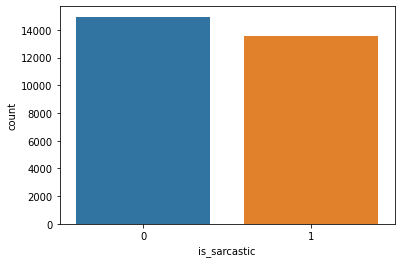

In [ ]:
sns.countplot(df['is_sarcastic'])

In [ ]:
len(df[df['is_sarcastic']==1])

13552

In [ ]:
len(df[df['is_sarcastic']==0])

14951

Sau khi vẽ biểu đồ ta nhận thấy số lượng các headline có tính mỉa mai và không mỉa mai với độ chênh lệch không quá cao (1399 headlines).



## Load data mới thu thập

Data vừa thu thập được lưu trong 2 file csv. Một file gồm những headline trâm biếm [link](https://github.com/ThuanPhong0126/CS114.K21/blob/master/Sarcasm/Case_Study_1.csv) đã được thu thập từ trang Theonion và một file gồm những headline không châm biếm [link](https://github.com/ThuanPhong0126/CS114.K21/blob/master/Sarcasm/dataminer_not_scarasm.csv) được thu thập từ trang Huffpost



Việc thu thập dữ liệu từ hai trang báo trên đều dựa vào công cụ [Data Scraper](https://chrome.google.com/webstore/detail/data-scraper-easy-web-scr/nndknepjnldbdbepjfgmncbggmopgden) được google chrome hỗ trợ. 

Sau khi hoàn tất quá trình thu thập thu được 2 file: một file chứa các headline được lấy từ Huffpost và một file chứa các headline được lấy từ Thonion.


1. Đầu tiên đọc từ file Case_Study_1.csv gồm các headline lấy từ trang Theonion. Việc đọc được thực hiện thông qua thư viện pandas với hàm pandas.read_csv

In [ ]:
test1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML/sarcasm/Case_Study_1.csv',encoding='unicode-escape')
test1

,Headline
0,Fair-Weather Bills Fan Not Even Banned From St...
1,Dad Reports Old Guy Being Honored On Field Alw...
2,Researchers Discover Referees Evolved Stripes ...
3,A.J. Hinch Warns Astros If They Lose World Ser...
4,"Dak Prescott Gains 80 Pounds, Moves Back In Wi..."
...,...
999,Heartbreaking Photos Of Polar Bears Who Will D...
1000,Disgusting Bigotry: The Media Is Only Blaming ...
1001,Speedrunner Accidentally Enjoys Game For A Moment
1002,Incredible Security: The Xbox Series X Will De...


Ban đầu đọc file không nhắc đến unicode thì chương trình đã phát sinh lỗi. Dựa vào stackoverflow đã tìm ra unicode phù hợp là unicode-escape

2. Tiếp theo, đọc từ file dataminer_not_scarasm.csv. Cách đọc tương tự như đọc file Case_Study_1.csv

In [ ]:
test2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML/sarcasm/dataminer_not_scarasm.csv',encoding='unicode-escape')
test2

,Column 1
0,Trump Compared To Segregationist George Wallac...
1,Pressed Repeatedly To Say âBlack Lives Matte...
2,Anthony Fauci Warned White House That Tulsa Ra...
3,Twitter Users Give Trump's Tulsa Rally Another...
4,Jon Stewart Says He Should've Axed Steve Carel...
...,...
1154,Store: Learn The Basics Of Project Management ...
1155,Dont Get Too Attached To Free Office Snacks
1156,Store: Improve Your Budding Side Hustle With A...
1157,"Joe Biden Stole Credit From Elizabeth Warren, ..."


Hai dataframe trên với mỗi dataframe tương ứng 1 trang báo. Test1 là dataframe chứa các headline được lấy từ trang Theonion với các headline có tỉnh mỉa mai. Việc thu thập nhận được 1004 headlines. Test2 là dataframe chứa các headline trong cột Column 1 được thu thập từ trang Huffpost với các headline chính thống và thu thập được 1159 headlines.

Do hai file có tên cột không giống nhau nên cần chọn lại tên cột chung là Headline và gán nhãn cho cả hai dataframe với test2 có nhãn mỗi headline là 0 và 1 đối với dataframe test1. Sau đó nối hai datafram test1 và test2 thông qua pandas.concat

1. Đặt lại tên cột cho test2

In [ ]:
test2.columns=['Headline']

2. Gán nhãn cho test1 và test2

In [ ]:
test1['is_sarcastic']=1
test2['is_sarcastic']=0

3. Nối hai dataframe

In [ ]:
test=pd.concat([test1,test2],axis=0)
test

,Headline,is_sarcastic
0,Fair-Weather Bills Fan Not Even Banned From St...,1
1,Dad Reports Old Guy Being Honored On Field Alw...,1
2,Researchers Discover Referees Evolved Stripes ...,1
3,A.J. Hinch Warns Astros If They Lose World Ser...,1
4,"Dak Prescott Gains 80 Pounds, Moves Back In Wi...",1
...,...,...
1154,Store: Learn The Basics Of Project Management ...,0
1155,Dont Get Too Attached To Free Office Snacks,0
1156,Store: Improve Your Budding Side Hustle With A...,0
1157,"Joe Biden Stole Credit From Elizabeth Warren, ...",0


Sau khi nối lại thu được một dataframe có tên test với 2163 headlines đã được gán nhãn với nhãn 0 tương ứng là tin chính thống, còn 1 là đối với các tin mỉa mai.

## Feature engineering

import một số thư viện cần dùng trong quá trình feature engineering

In [ ]:
import re
import string

Đối với mỗi headline sẽ được xử lí trước khi chuyển về dạng vector gồm các con số.

Mỗi headline sẽ được xử lí gồm các giai đoạn: chuyển tất cả ký tự về chữ thường, loại bỏ tất cả các ký tự đặc biệt, xóa các ký tự khoảng trắng ở đầu và cuối headline.

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def xuli_headline(headline_):
  headline_=''.join(ch for ch in headline_ if ch in (string.ascii_letters+string.digits+' '))
  headline_=headline_.lower()
  headline_=headline_.strip()
  return headline_

Sử dụng dòng lặp for để xử lý qua tất cả các headline trong df sau đó lưu vào corpus. Corpus gồm các headline đã qua bước xử lý.

In [ ]:
corpus=[]
for headline_ in df['headline']:
  corpus.append(xuli_headline(headline_))

Sử dụng phương pháp Tfidf để chuyển các headline thành vector đặc trưng gồm các con số.

Phương pháp tfidf tốt hơn so với bag of word vì tfidf có tính đến độ quan trọng của một từ đối với một câu. Công thức tính tfidf của một từ: tfidf=tf(t,d)*idf(t,D) với TF(t, d) = ( số lần từ t xuất hiện trong văn bản d) / (tổng số từ trong văn bản d) và IDF(t, D) = log_e( Tổng số văn bản trong tập mẫu D/ Số văn bản có chứa từ t )



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Sử dụng hàm TfidfVectorizer được cung cấp bởi sklearn để mã hóa headline với stop_words='english', sử dụng stop_words để bỏ đi các từ không mang ý nghĩa trong việc quyết định nghĩa của câu.

In [ ]:
tf=TfidfVectorizer(stop_words='english')
corpus=tf.fit_transform(corpus)

In [ ]:
corpus

<28503x29328 sparse matrix of type '<class 'numpy.float64'>'
	with 194194 stored elements in Compressed Sparse Row format>

Sau khi xử lý thì thu được 28503 vector tương ứng với 28503 headline ban đầu. 

## Tạo ra các bộ data gồm có training_set, test_set, validation-set

Với bộ training-set và test_set được lấy ra từ dataframe df với tỷ lệ 70%train/30%validation, bộ test_set là dataframe test vừa được thu thập mới.


Features cho hai bộ train và valid là headline sau khi xử lý (corpus) và label là tương ứng với cột is_sarcastic

In [ ]:
y=df['is_sarcastic']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(corpus,y,test_size=0.3,random_state=42)

In [ ]:
X_train

<19952x29328 sparse matrix of type '<class 'numpy.float64'>'
	with 136058 stored elements in Compressed Sparse Row format>

Tập train gồm có 19952 headlines, tập validation có 8551 headlines.

In [ ]:
X_valid

<8551x29328 sparse matrix of type '<class 'numpy.float64'>'
	with 58136 stored elements in Compressed Sparse Row format>

##Chọn model

Trong quá trình chọn model sẽ sử dụng accuracy_score để đánh giá model. accuracy_score là tỷ lệ những headline được dự đoán đúng. Khi accuracy_score càng gần 100 thì model được xem là càng tốt. Các accuracy_score của các model được lưu vào dictionary tên là score.

In [ ]:
score={}

#### LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict1=model1.predict(X_valid)

In [ ]:
score['LR']=accuracy_score(y_valid,predict1)
print(accuracy_score(y_valid,predict1))

0.7972285563936151


#### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model2=RandomForestClassifier()

In [ ]:
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predict2=model2.predict(X_valid)

In [ ]:
score['RF']=accuracy_score(y_valid,predict2)
print(accuracy_score(y_valid,predict2))

0.7633748465181547


#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
model3=SVC().fit(X_train,y_train)

In [ ]:
predict3=model3.predict(X_valid)

In [ ]:
score['SVC']=accuracy_score(y_valid,predict3)
print(accuracy_score(y_valid,predict3))

0.8045956849675495


In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
model4=LinearSVC()
model4.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
predict4=model4.predict(X_valid)

In [ ]:
score['LSVC']=accuracy_score(y_valid,predict4)

print(accuracy_score(y_valid,predict4))

0.7942466233994037


#### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model5=DecisionTreeClassifier()
model5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predict5=model5.predict(X_valid)

In [ ]:
score['DT']=accuracy_score(y_valid,predict5)
print(accuracy_score(y_valid,predict5))

0.7265392036484827


#### K-Nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model6=KNeighborsClassifier()
model6.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predict6=model6.predict(X_valid)

In [ ]:
score['KNN']=accuracy_score(y_valid,predict6)
print(accuracy_score(y_valid,predict6))

0.6088405542887213


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
model7=BernoulliNB()
model7.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
predict7=model7.predict(X_valid)

In [ ]:
score['BNB']=accuracy_score(y_valid,predict7)
print(accuracy_score(y_valid,predict7))

0.803999532218454


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model8=MultinomialNB()
model8.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predict8=model8.predict(X_valid)

In [ ]:
score['MNB']=accuracy_score(y_valid,predict8)
print(accuracy_score(y_valid,predict8))

0.8024907910892826


#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model9=GradientBoostingClassifier()
model9.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
predict9=model9.predict(X_valid)

In [ ]:
score['GB']=accuracy_score(y_valid,predict9)
print(accuracy_score(y_valid,predict9))

0.6723381862831083


#### XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model10=XGBClassifier()
model10.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predict10=model10.predict(X_valid)

In [ ]:
score['XGB']=accuracy_score(y_valid,predict10)
print(accuracy_score(y_valid,predict10))

0.6684792141729521


####Lựa chọn model

In [ ]:
S=pd.DataFrame()
S['model']=score.keys()
S['score']=score.values()
S

,model,score
0,LR,0.797229
1,RF,0.763375
2,SVC,0.804596
3,LSVC,0.794247
4,DT,0.726539
5,KNN,0.608841
6,BNB,0.805648
7,MNB,0.802491
8,GB,0.672338
9,XGB,0.668479


Thông qua bảng S bên trên t có thể thấy accuracy_score của BernoulliNB (BNB) là cao nhất nên ta chọn model chính thức là BernoulliNB

In [ ]:
model=model7

Lưu model 

Thư viện pickle được sử dụng để lưu model

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('/content/drive/My Drive/Colab Notebooks/ML/sarcasm/model.sav', 'wb'))

## Ứng dụng có khả năng dự đoán cho một headline mới

In [ ]:
loaded_model = pickle.load(open('/content/drive/My Drive/Colab Notebooks/ML/sarcasm/model.sav', 'rb'))

In [ ]:
headline=input('Enter the headline to predict: ')
headline=xuli_headline(headline)
headline=tf.transform([headline])
print('Sarcasm' if loaded_model.predict(headline)==1 else 'Not sarcasm')

Enter the headline to predict: Russia Opens Polls For Vote On Extending Putin's Rule Until 2036
Not sarcasm


##Thực hiện dự đoán trên 2000 headlines được thu thập

In [ ]:
test

,Headline,is_sarcastic
0,Fair-Weather Bills Fan Not Even Banned From St...,1
1,Dad Reports Old Guy Being Honored On Field Alw...,1
2,Researchers Discover Referees Evolved Stripes ...,1
3,A.J. Hinch Warns Astros If They Lose World Ser...,1
4,"Dak Prescott Gains 80 Pounds, Moves Back In Wi...",1
...,...,...
1154,Store: Learn The Basics Of Project Management ...,0
1155,Dont Get Too Attached To Free Office Snacks,0
1156,Store: Improve Your Budding Side Hustle With A...,0
1157,"Joe Biden Stole Credit From Elizabeth Warren, ...",0


###Dự đoán với bộ test 1000 câu sarcasm và 1000 câu không sarcasm

Chọn ra bộ data với 1000 headline mỉa mai và 1000 headline chính thống.

In [ ]:
test1=pd.concat([test[test['is_sarcastic']==0][:1000],test[test['is_sarcastic']==1][:1000]])
test1

,Headline,is_sarcastic
0,Trump Compared To Segregationist George Wallac...,0
1,Pressed Repeatedly To Say âBlack Lives Matte...,0
2,Anthony Fauci Warned White House That Tulsa Ra...,0
3,Twitter Users Give Trump's Tulsa Rally Another...,0
4,Jon Stewart Says He Should've Axed Steve Carel...,0
...,...,...
995,A True Miracle: This Woman Just Gave Birth To ...,1
996,"Good News, Final Fantasy Fans: Looks Like Th...",1
997,Terrifying Implications: Leaked Nintendo Sourc...,1
998,The 11 Best Games To Play For The Nintendo Switch,1


Xử lí các headline tương tự như xử lí các headline đã train trước đó.

In [ ]:
feature=[]
for headline_ in test1['Headline']:
  feature.append(xuli_headline(headline_))

Chuyển các headline về thành vector đặc trưng thông qua Tfidf. Và sử dụng lại túi từ vựng đã xây dựng trên tập train. Đối với hàm transform thì những từ có trong tập test mà không có trong tập train sẽ được bỏ qua.

In [ ]:
feature=tf.transform(feature)
feature

<2000x29328 sparse matrix of type '<class 'numpy.float64'>'
	with 14503 stored elements in Compressed Sparse Row format>

In [ ]:
y_test=test1['is_sarcastic']

Tiến hành dự đoán trên model đã lưu trước đó.

In [ ]:
predict=loaded_model.predict(feature)

In [ ]:
print(accuracy_score(y_test,predict))

0.701


In [ ]:
print(score['BNB'])

0.803999532218454


accuray_score ở bộ test với 2000 headlines khá thấp (70,1%) thấp hơn so với bộ data được train và thử nghiệm trước đó trên bộ dataset của kaggle. Trước đó đã thu được accuray_score lên đến 80%

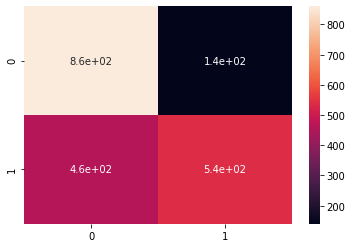

In [ ]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True)

Với độ chính xác 70,45% thì việc dự đoán còn khá nhiều sai sót. Khá nhiều headline với is_sarcastic=0 được dự đoán đúng (khoảng 860 headlines). Và headline với is_sarcastic=1 dự đoán sai khá nhiều trong khi số lượng dự đoán đúng chỉ vào khoảng 540/1000 headline.



In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74      1000
           1       0.79      0.54      0.64      1000

    accuracy                           0.70      2000
   macro avg       0.72      0.70      0.69      2000
weighted avg       0.72      0.70      0.69      2000



Dòng đầu tiên: 65% các headline được dự đoán là 0 là đúng, 86% các headline có label là 0 được dự đoán đúng và f1-score là độ chính xác của model (f1-score gần bằng 1 thì model càng chính xác) và f1-score được tính bởi công thức 

f1=2.((precision*recall)/(precision+recall))

f1 của bài toán trên là 0.7

Đối với những bài toán mà có số lượng dữ liệu test lệch về một bên thì lúc này accuray-score sẽ không còn chính xác và f1-score sẽ đưa ra độ chính xác chính xác hơn.

### Dự đoán với bộ test 1000 câu sarcasm và 100 câu không sarcasm

Bước làm tương tự lần 1

In [ ]:
test2=pd.concat([test[test['is_sarcastic']==0][:1000],test[test['is_sarcastic']==1][:100]])
test2

,Headline,is_sarcastic
0,Trump Compared To Segregationist George Wallac...,0
1,Pressed Repeatedly To Say âBlack Lives Matte...,0
2,Anthony Fauci Warned White House That Tulsa Ra...,0
3,Twitter Users Give Trump's Tulsa Rally Another...,0
4,Jon Stewart Says He Should've Axed Steve Carel...,0
...,...,...
95,Easy-Going Mel Kiper Predicts Teams Will Do Wh...,1
96,Racine Legion To Select Second Overall In NFL ...,1
97,Steve Kerr Reminds Warriors To Seem Sad DeMarc...,1
98,Kid About To Meet Brooklyn Nets Must Not Be Ve...,1


In [ ]:
feature=[]
for headline_ in test2['Headline']:
  feature.append(xuli_headline(headline_))

In [ ]:
feature=tf.transform(feature)
feature

<1100x29328 sparse matrix of type '<class 'numpy.float64'>'
	with 7900 stored elements in Compressed Sparse Row format>

In [ ]:
y_test=test2['is_sarcastic']

In [ ]:
predict=loaded_model.predict(feature)

In [ ]:
print(accuracy_score(y_test,predict))

0.8345454545454546


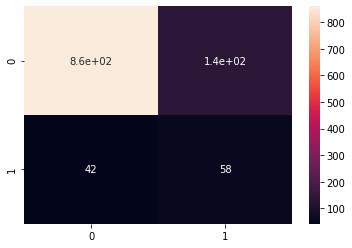

In [ ]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True)

Với độ chính xác khi dự đoán lên đến hơn 83%, trong 1000 headline không mỉa mai thì đã được dự đoán đúng lên đến 860 headline và trong 100 headline mỉa mai thì chỉ dự đoán đúng được 58 headline. Với độ chính xác tăng cao là thông qua test lần 1, chúng ta đã thấy model dự đoán khá tốt đối với những headline không mỉa mai nên đối với bộ dataset test lần 2 này có số lượng câu không mỉa mai nhiều gấp 10 lần số lượng câu mỉa mai nên đã làm cho model có accuracy_score tăng cao.

### Dự đoán với bộ test 100 câu sarcasm và 1000 câu không sarcasm

Bước thực hiện tương tự lần 1

In [ ]:
test3=pd.concat([test[test['is_sarcastic']==0][:100],test[test['is_sarcastic']==1][:1000]])
test3

,Headline,is_sarcastic
0,Trump Compared To Segregationist George Wallac...,0
1,Pressed Repeatedly To Say âBlack Lives Matte...,0
2,Anthony Fauci Warned White House That Tulsa Ra...,0
3,Twitter Users Give Trump's Tulsa Rally Another...,0
4,Jon Stewart Says He Should've Axed Steve Carel...,0
...,...,...
995,A True Miracle: This Woman Just Gave Birth To ...,1
996,"Good News, Final Fantasy Fans: Looks Like Th...",1
997,Terrifying Implications: Leaked Nintendo Sourc...,1
998,The 11 Best Games To Play For The Nintendo Switch,1


In [ ]:
feature=[]
for headline_ in test3['Headline']:
  feature.append(xuli_headline(headline_))

In [ ]:
feature=tf.transform(feature)
feature

<1100x29296 sparse matrix of type '<class 'numpy.float64'>'
	with 8180 stored elements in Compressed Sparse Row format>

In [ ]:
y_test=test3['is_sarcastic']

In [ ]:
predict=loaded_model.predict(feature)

In [ ]:
print(accuracy_score(y_test,predict))

0.5763636363636364


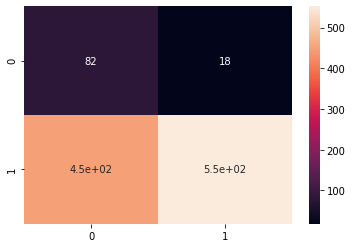

In [ ]:
sns.heatmap(confusion_matrix(y_test,predict),annot=True)

Với accuray_score ở lần test thứ 3 đã giảm xuống còn 57,64%. Do model dự đoán khá đúng với các headline không mỉa mai, nhưng lần test 3 các headline không mỉa mai lại khá ít (100) so với các headline mỉa mai (1000) nên làm cho model dự đoán đúng khá ít các headline. Với 1000 headline mỉa mai thì model chỉ dự đoán đúng 550 headline và trong 100 headline không mỉa mai thì model dự đoán đúng 82 headline.

Nhận xét về bài toán: Đây là bài toán khá thực tế và có thể áp dụng vào nhiều ứng dụng. Tuy nhiên độ chính xác của bài toán theo cách giải bên trên còn khá thấp và chưa thể đưa vào sử dụng thực tế. Bài toán cần được nghiên cứu nhiều hơn cũng như tìm ra phương pháp làm cho bài toán đạt được độ chính xác cao hơn.